## 03. PyTorch Computer Vision

Resource coursebook: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can levarage for your own problems
* `torchvision.transforms` - function for manipulating your vision data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - create a Python iterable over a datasets

In [59]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.7.1
0.22.1


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from `torchvision.datasets`

In [60]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training dataset
    download=True, # do we want to download it
    transform=ToTensor(), # how do we want to transform teh data
    target_transform=None, # how do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [61]:
len(train_data), len(test_data)

(60000, 10000)

In [62]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [63]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [64]:
class_to_dix = train_data.class_to_idx
class_to_dix

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [65]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [66]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {label}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 9


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


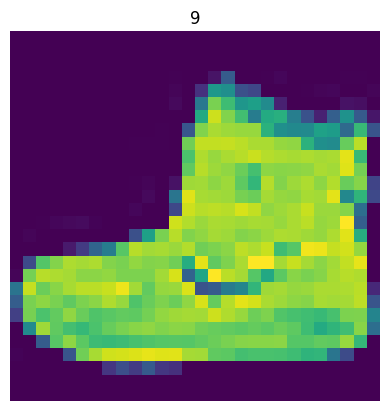

In [67]:
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.title(label)
plt.imshow(image.squeeze())
plt.axis(False)
plt.show()

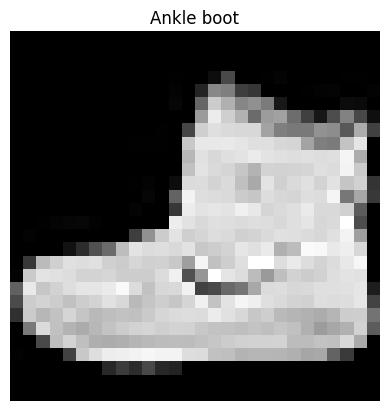

In [68]:
plt.title(class_names[label])
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.show()

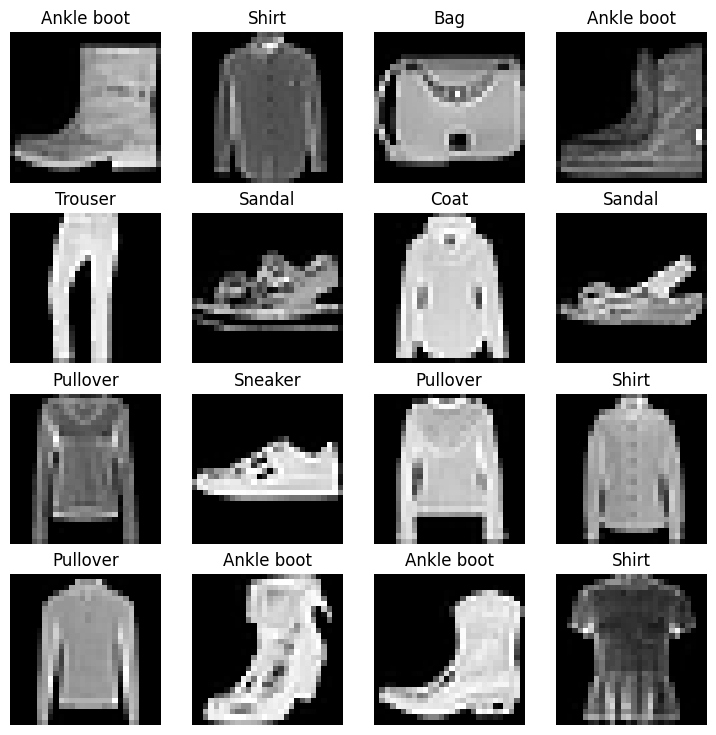

In [69]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    
    img, label = train_data[random_idx]
    
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or you think we'll need non-linearity?

## 2. Prepare dataloader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in your computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch

In [70]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_data_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_data_loader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [71]:
# Let's check out what we've created
print(f"DataLoaders: {train_data_loader, test_data_loader}")
print(f"Length of train_data_loader: {len(train_data_loader)} batches of {BATCH_SIZE}...")
print(f"Length of test_data_loader: {len(test_data_loader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x1389ef890>, <torch.utils.data.dataloader.DataLoader object at 0x150165810>)
Length of train_data_loader: 1875 batches of 32...
Length of test_data_loader: 313 batches of 32...


In [72]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

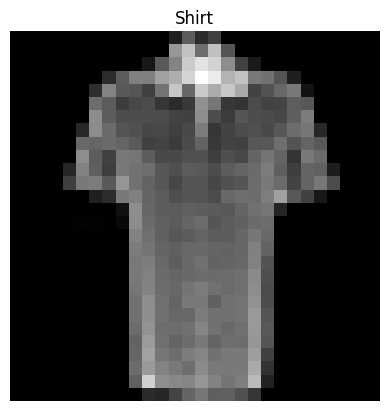

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


In [73]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Create a baseline model

When starting to build a series of machine learning experiments, it's best practice to start with a baseline model

A baselin model is a simple model you will try and improve upon with subsequent  models/experiments

In other words: start simply and add complexity when necessary

In [74]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f"shape before flattening: {x.shape} -> [color_channels, height, width]")

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happend
print(f"shape after flattening: {output.shape} -> [color_channels, height * width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [75]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [76]:
from math import inf
from pandas import infer_freq
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [77]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28 * 28
    hidden_units=32,
    output_shape=len(class_names) # one for every class
).to("cpu")

In [78]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [79]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[ 0.0461, -0.1040,  0.2095,  0.0458, -0.0841, -0.3552,  0.0832, -0.1319,
          0.1477,  0.0418]], grad_fn=<AddmmBackward0>)

In [80]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0023,  0.0071,  0.0330,  ...,  0.0164, -0.0095, -0.0053],
                      [ 0.0167, -0.0324,  0.0086,  ..., -0.0090,  0.0203, -0.0100],
                      [-0.0118,  0.0119, -0.0080,  ..., -0.0193,  0.0170,  0.0246]])),
             ('layer_stack.1.bias',
              tensor([ 0.0161, -0.0159,  0.0234,  0.0084, -0.0339, -0.0047, -0.0323, -0.0125,
                       0.0065, -0.0339, -0.0036,  0.0208,  0.0018,  0.0308, -0.0056, -0.0006,
                      -0.0294, -0.0100,  0.0059,  0.0271,  0.0328, -0.0049,  0.0312,  0.0041,
                       0.0242,  0.0212, -0.0234,  0.0345,  0.0085, -0.0198, -0.0343,  0.0012])),
             

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss functionwill be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem let's use accuracy as our evaluation problem

In [81]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates when two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [82]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1,
)

In [83]:
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [84]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [85]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.27909988805186e-05

### 3.3 Creating a trainig loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happeninig
5. Time it all

In [86]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Creat training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    
    ### Training
    train_loss = 0
    
    # Add a loop to loop through the training batches
    for batch, (X_train, y_train) in enumerate(train_data_loader):
        model_0.train()
                
        # 1. Forward pass
        y_pred = model_0(X_train)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y_train)
        train_loss += loss # accumulate train loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step() # updates one per batch rather than once per epoch

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X_train)}/{len(train_data_loader.dataset)} sampels.")
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_data_loader)
    
    ### Testing
    test_loss, test_acc = 0, 0
    
    model_0.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            
            # 1. Forward pass
            test_pred = model_0(X_test)
            
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
                        
            # 3. Calculate accuracy
            test_acc += accuracy_fn(
                y_true=y_test, 
                y_pred=test_pred.argmax(dim=1)
            )
            
        # Calculate the test loss average per batch
        test_loss /= len(test_data_loader)
        
        # Calculate the test accuracy average per batch
        test_acc /= len(test_data_loader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}\n")

# Calculate training time
train_time_end_on_ecp = timer()

total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_ecp,
    device=str(next(model_0.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Looked at 0/60000 sampels.
Looked at 12800/60000 sampels.
Looked at 25600/60000 sampels.
Looked at 38400/60000 sampels.
Looked at 51200/60000 sampels.

Train loss: 0.5851 | Test loss: 0.5026 | Test acc: 82.4181

Epoch: 1

Looked at 0/60000 sampels.
Looked at 12800/60000 sampels.
Looked at 25600/60000 sampels.
Looked at 38400/60000 sampels.
Looked at 51200/60000 sampels.

Train loss: 0.4756 | Test loss: 0.4851 | Test acc: 82.8275

Epoch: 2

Looked at 0/60000 sampels.
Looked at 12800/60000 sampels.
Looked at 25600/60000 sampels.
Looked at 38400/60000 sampels.
Looked at 51200/60000 sampels.

Train loss: 0.4544 | Test loss: 0.4782 | Test acc: 83.4864

Train time on cpu: 7.398 seconds


## 4. Make predictions and get `model_0` results

In [87]:
torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module, 
    data_loader: torch.utils.data.DataLoader, 
    loss_fn: torch.nn.Module, 
    accuracy_fn,
    device: torch.device = "cpu",
):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss / acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        "model_name": model.__class__.__name__, # only works when model was created with a class
        "model_loss": loss,
        "model_acc": acc
    }

# Calculate model_0 results on test dataset
model_0_results = eval_model(model_0, test_data_loader, loss_fn, accuracy_fn)

print(f"Mode name: {model_0_results['model_name']} | Test loss: {model_0_results['model_loss']} | Test acc: {model_0_results['model_acc']}")

  0%|          | 0/313 [00:00<?, ?it/s]

Mode name: FashionMNISTModelV0 | Test loss: 0.47821298241615295 | Test acc: 83.48642172523962


## 5. Setup device agnostic-code

In [88]:
# Set up device agnostic code
# device = "cuda" if torch.cuda.is_available() else ("mps" if torch.mps.is_available() else "cpu")
device = "cpu"

Sometimes, depending on your data / hardware you might find that your model trains faster on CPU than GPU

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweights the cmoputer benefits offered by the GPU
2. The hardware you're using has a better CPU in terms computer capability than the GPU

## 6. Building a better model with non-linearity

We learned about the power of non-linearity with notebook 02

In [89]:
# Create a model with linear and non-linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, in_shape: int, out_shape: int, hidden_units: int):
        super().__init__()
        
        self.flatten = nn.Flatten() # flatten inputs into a single vector
        
        self.layer_1 = nn.Linear(
            in_features=in_shape,
            out_features=hidden_units
        )
        self.layer_2 = nn.Linear(
            in_features=hidden_units,
            out_features=hidden_units
        )
        self.layer_3 = nn.Linear(
            in_features=hidden_units,
            out_features=out_shape
        )
        
        self.relu = nn.ReLU() # add non-linearity
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(self.flatten(x)))))))

model_1 = FashionMNISTModelV1(
    in_shape=784, # output of the flatten layer
    out_shape=len(class_names), 
    hidden_units=32
).to(device) # send to device if available

model_1

FashionMNISTModelV1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=784, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)

In [90]:
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [91]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates when two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [92]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD( # tries to update our model's parameters to reduce loss
    params=model_1.parameters(), 
    lr=0.1
)

loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 6.2 Functioning training and evaluation/testing loops

Let's create a function for:

* training loop - `train_step()`
* testing loop - `test_step()`

In [93]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device=device,
) -> None:
    """Performs a training with model trying to learn data_loader"""
    train_loss, train_acc = 0, 0
    
    # Put model into training mode
    model = model.to(device)
    
    # Add a loop to loop through training data
    for batch, (X_train, y_train) in enumerate(data_loader):
        # Put data on target device
        X_train, y_train = X_train.to(device), y_train.to(device)
        
        # 1. Forward pass
        y_pred = model(X_train)
        
        # 2. Calculate loss and acc (per batch)
        loss = loss_fn(y_pred, y_train)
        train_loss += loss # accumulate train loss
        
        acc = accuracy_fn(
            y_true=y_train, 
            y_pred=y_pred.argmax(dim=1) # logits -> prediction probabilites
        )
        train_acc += acc # accumulate train acc
        
        # 3. Optomizer zero grade
        optimizer.zero_grad()
        
        # 4. Loss backawrd
        loss.backward()
        
        # 5. Optimizer step (update the model's parameters once per batch)
        optimizer.step() 
    
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    # Print out what's happening
    print(f"Train loss: {train_loss:.4} | Train acc: {train_acc:.4f}%")

In [94]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device=device,
) -> None:
    """Performs a testing with model trying to learn data_loader"""
    test_loss, test_acc = 0, 0
    
    model.to(device)
    
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Put data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            # 1. Forward pass
            y_pred = model(X_test)
            
            # 2. Calculate loss and accuracy (accumlatively)
            test_loss += loss_fn(y_pred, y_test)
            test_acc += accuracy_fn(
                y_true=y_test,
                y_pred=y_pred.argmax(dim=1) # go from logits -> prediction labels
            )
            
        # Calculate the loss average per batch
        test_loss /= len(data_loader)
        
        # Calculate the loss average per batch
        test_acc /= len(data_loader)
        
        # Print out what's happening
        print(f"Test loss: {test_loss:.4} | Test acc: {test_acc:.4f}%")

In [95]:
torch.manual_seed(42)

# Measure time 
train_timer_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimiziation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    
    train_step(
        model=model_1,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device,
    )
    
    test_step(
        model=model_1,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device,
    )
    
train_timer_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(
    start=train_timer_start_on_gpu,
    end=train_timer_end_on_gpu,
    device=device,
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 1.202 | Train acc: 63.3767%
Test loss: 1.022 | Test acc: 70.8667%
Epoch: 1

Train loss: 0.7484 | Train acc: 78.6317%
Test loss: 0.6051 | Test acc: 81.6317%
Epoch: 2

Train loss: 0.6053 | Train acc: 81.1950%
Test loss: 0.6172 | Test acc: 80.8433%
Train time on cpu: 10.911 seconds


In [96]:
# Get model_1 results dictionary
model_1_results = eval_model(
    model=model_1,
    data_loader=test_data_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': tensor(0.6557),
 'model_acc': 79.85223642172524}

In [97]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': tensor(0.4782),
 'model_acc': 83.48642172523962}

## 7. Build a convolutional neural network (CNN) - model 2

CNN's are also known ConvNets

CNN's are know for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [98]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website
    """
    def __init__(self, in_shape: int, hidden_units: int, out_shape: int) -> None:
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer
            nn.Conv2d(
                in_channels=in_shape,
                out_channels=hidden_units,
                kernel_size=(3, 3), # how big is the square that's going over the image
                stride=1,
                padding=1, # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=2,
            )
        )
    
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=2,
            ),
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * 7 * 7, # there is a trick to calculate this...
                out_features=out_shape,
            )
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        z = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {z.shape}")
        
        z = self.conv_block_2(z)
        # print(f"Output shape of conv_block_2: {z.shape}")
        
        z = self.classifier(z)
        # print(f"Output shape of classifier: {z.shape}")
        
        return z

In [99]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    in_shape=1,
    out_shape=len(class_names),
    hidden_units=64,
).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

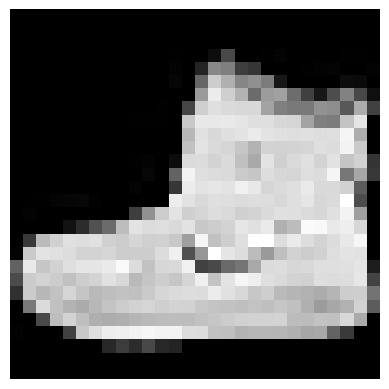

In [100]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.show()

In [101]:
# Pass image through model
model_2(image.unsqueeze(dim=1))

tensor([[-0.0039,  0.0135,  0.0136,  0.0265,  0.0249,  0.0150, -0.0071,  0.0043,
         -0.0383,  0.0096]], grad_fn=<AddmmBackward0>)

In [102]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28)).to(device)

In [103]:
# Pass random tensor through model
model_2(rand_image_tensor)

tensor([[-0.0098, -0.0218,  0.0137,  0.0146,  0.0285,  0.0176, -0.0169, -0.0015,
         -0.0949,  0.0560]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [104]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Test image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Test image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978, 

In [105]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10, 
    kernel_size=(3, 3),
    stride=1,
    padding=1,
)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [106]:
test_image.shape, conv_output.shape

(torch.Size([3, 64, 64]), torch.Size([10, 64, 64]))

### 7.2 Stepping through `nn.MaxPool2d()`

In [107]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [108]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimenstion: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going thorugh conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimenstion: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going thorugh conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [109]:
torch.manual_seed(42)
# Create a random tensor with a smiliar number of dimensions to our image
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor thorugh the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function, optimizer and evaluation metrics for `model_2`

In [110]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.1
)

In [111]:
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [112]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates when two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [113]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using our training and testing functions

In [119]:
device="mps"

In [120]:
torch.manual_seed(42)

# Measure time
start_time = timer()

# Train and test model
epoch = 3

for epoch in tqdm(range(epoch)):
    print(f"\nEpoch: {epoch}\n")
    
    train_step(
        model=model_2,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    
    test_step(
        model=model_2,
        data_loader=test_data_loader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device,
    )

# Measure time
end_time = timer()

total_train_time_model_2 = print_train_time(
    start=start_time,
    end=end_time,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

Train loss: 0.2248 | Train acc: 91.9583%
Test loss: 0.2415 | Test acc: 91.3538%

Epoch: 1

Train loss: 0.2034 | Train acc: 92.7350%
Test loss: 0.2415 | Test acc: 91.2440%

Epoch: 2

Train loss: 0.1887 | Train acc: 93.1583%
Test loss: 0.2474 | Test acc: 91.4736%
Train time on mps: 76.306 seconds


In [121]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=train_data_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device,
)
model_2_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.1653, device='mps:0'),
 'model_acc': 94.015}

## 8. Compare model results and training time

In [122]:
import pandas as pd

compare_results = pd.DataFrame(
    [model_0_results, model_1_results, model_2_results]
)
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,tensor(0.4782),83.486422
1,FashionMNISTModelV1,tensor(0.6557),79.852236
2,FashionMNISTModelV2,"tensor(0.1653, device='mps:0')",94.015000


In [123]:
# Add training time to results comparison
compare_results["training_time"] = [
    total_train_time_model_0, total_train_time_model_1, total_train_time_model_2
]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,tensor(0.4782),83.486422,7.397986
1,FashionMNISTModelV1,tensor(0.6557),79.852236,10.910964
2,FashionMNISTModelV2,"tensor(0.1653, device='mps:0')",94.015000,76.306189


Text(0, 0.5, 'model')

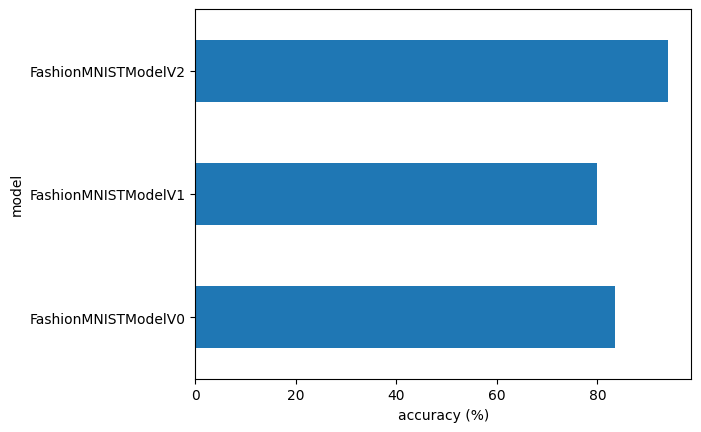

In [124]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [125]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = "cpu"
):
    pred_probs = []
    model.eval()
    model.to(device)
    
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> pred probabilities)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off the GPU for futher calculations
            pred_probs.append(pred_prob.cpu())
        
    # Stack the preb_probs to trun list into a tensor
    return torch.stack(pred_probs)
            

In [127]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

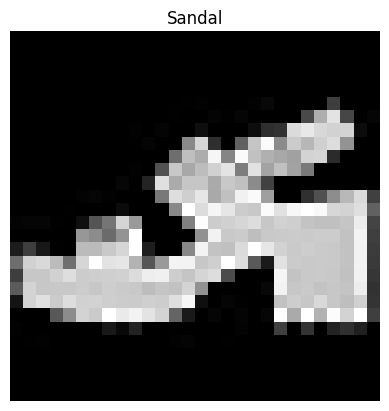

In [132]:
plt.imshow(test_samples[0].squeeze(), cmap="grey")
plt.title(class_names[test_labels[0]])
plt.axis(False)
plt.show()

In [134]:
# Make predictions
pred_probs = make_predictions(
    model=model_2,
    data=test_samples
)

# View first two prediction probabilites
pred_probs[:5]

tensor([[7.7249e-10, 4.0685e-12, 2.2187e-10, 1.2076e-13, 2.1919e-12, 1.0000e+00,
         4.3108e-09, 1.6728e-09, 1.7653e-07, 6.6327e-07],
        [6.7714e-03, 9.6826e-01, 8.4716e-04, 1.7651e-02, 4.3070e-03, 4.9743e-05,
         1.9183e-03, 2.8834e-05, 4.9077e-05, 1.1592e-04],
        [1.6841e-06, 1.0527e-09, 1.5725e-07, 2.2680e-07, 5.2217e-08, 3.2959e-06,
         3.9476e-07, 9.9279e-01, 4.3897e-05, 7.1576e-03],
        [6.3292e-05, 1.1739e-05, 9.2459e-03, 1.6125e-06, 9.9055e-01, 6.9702e-08,
         1.2270e-04, 5.9019e-08, 1.5785e-06, 3.9474e-06],
        [5.0484e-02, 4.3407e-06, 5.3791e-05, 9.2507e-01, 2.0969e-02, 2.5694e-05,
         2.9751e-03, 4.0738e-05, 5.4731e-05, 3.2269e-04]])

In [135]:
# Conver prediction probabilites to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])